In [69]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np

In [70]:
model = Sequential()
model.add(Dense(300,input_dim=5 , activation='relu'))
model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam",metrics=['mean_squared_error']) #با این دستور مدل خودمون رو درست میکنیم

In [71]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 300)               1800      
                                                                 
 dense_9 (Dense)             (None, 1)                 301       
                                                                 
Total params: 2,101
Trainable params: 2,101
Non-trainable params: 0
_________________________________________________________________


In [72]:
# from keras_visualizer import visualizer
# visualizer(model,file_name="adnan",file_format="png")

In [73]:
df = pd.read_csv('co2.csv')

In [74]:
df.head(10)

,engine,cylandr,fuelcity,fuelwy,fuelcomb,out1
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


In [75]:
x=df.drop('out1',axis=1)
y=df.out1

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [77]:
h = model.fit(x_train,y_train,epochs=300)

Epoch 1/300
185/185 [==============================] - 0s 650us/step - loss: 28888.7578 - mean_squared_error: 28888.7578
Epoch 2/300
185/185 [==============================] - 0s 650us/step - loss: 590.4703 - mean_squared_error: 590.4703
Epoch 3/300
185/185 [==============================] - 0s 588us/step - loss: 568.2852 - mean_squared_error: 568.2852
Epoch 4/300
185/185 [==============================] - 0s 749us/step - loss: 565.4042 - mean_squared_error: 565.4042
Epoch 5/300
185/185 [==============================] - 0s 667us/step - loss: 560.9228 - mean_squared_error: 560.9228
Epoch 6/300
185/185 [==============================] - 0s 704us/step - loss: 556.7552 - mean_squared_error: 556.7552
Epoch 7/300
185/185 [==============================] - 0s 633us/step - loss: 552.9284 - mean_squared_error: 552.9284
Epoch 8/300
185/185 [==============================] - 0s 601us/step - loss: 546.2419 - mean_squared_error: 546.2419
Epoch 9/300
185/185 [==============================] - 0s 61

In [83]:
Y_pred=model.predict(x_test)

47/47 [==============================] - 0s 541us/step


In [86]:
Y_pred

array([[217.8562 ],
       [268.59445],
       [234.11781],
       ...,
       [217.47969],
       [123.85586],
       [271.4115 ]], dtype=float32)

In [87]:
y_test

4358    219
3738    271
275     232
4344    242
1521    290
       ... 
5620    270
4075    245
2555    218
4298    120
1141    269
Name: out1, Length: 1477, dtype: int64

In [88]:
test1=np.array([[3,6,13.1,8.8,11.2]])
test_out=model.predict(test1)
print(test_out)

1/1 [==============================] - 0s 11ms/step
[[259.37637]]


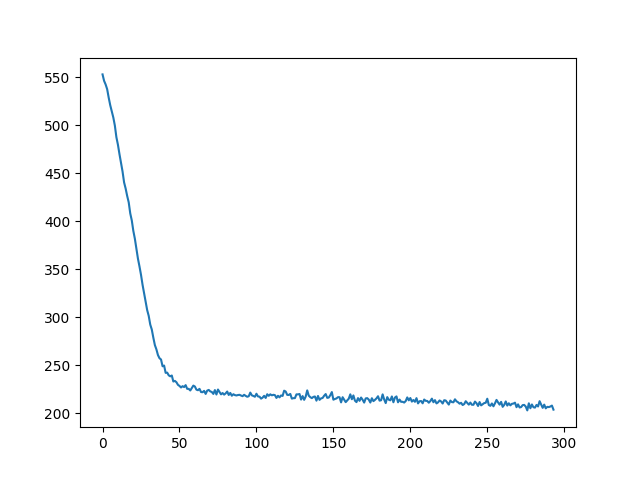

In [89]:
from matplotlib import pyplot as plt
%matplotlib widget
er=h.history['loss']
er=er[6:]
plt.close()
plt.plot(er)